**ACTIVE SALES ANALYSIS**

**STEP 1 👇**

In \[203\]:

    #Lets import the required libraries required 
    #As well as importing the data inform of a csv file as shown below
    #In form of a dataframe
    import numpy as np
    import pandas as pd
    orders = pd.read_csv("orders.csv")
    orders.head()

Out\[203\]:

|     | Name     | Email                     | Product                                     | Transaction Date    |
|-----|----------|---------------------------|---------------------------------------------|---------------------|
| 0   | PERSON_1 | PERSON_1@gmail.com        | PRODUCT_75                                  | 01/03/2021 00:47:26 |
| 1   | PERSON_2 | PERSON_2@tataprojects.com | PRODUCT_75                                  | 01/03/2021 02:04:07 |
| 2   | PERSON_3 | PERSON_3@gmail.com        | PRODUCT_63                                  | 01/03/2021 09:10:43 |
| 3   | PERSON_4 | PERSON_4@gmail.com        | PRODUCT_63                                  | 01/03/2021 09:49:48 |
| 4   | PERSON_5 | PERSON_5@gmail.com        | PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89 | 01/03/2021 10:56:46 |

**STEP 2 👇**

In \[205\]:

    #Need to investigate the data we have
    #Or any incorrect row or columns that have to be delt with 
    orders.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 581 entries, 0 to 580
    Data columns (total 4 columns):
     #   Column            Non-Null Count  Dtype 
    ---  ------            --------------  ----- 
     0   Name              581 non-null    object
     1   Email             581 non-null    object
     2   Product           581 non-null    object
     3   Transaction Date  581 non-null    object
    dtypes: object(4)
    memory usage: 18.3+ KB

**STEP 3👇**

In \[265\]:

    # Creating a new column  Time from Transaction Date 
    orders["Time"] = pd.to_datetime(orders["Transaction Date"],errors="coerce")
    #From the Time column above we need to  
    # Make a nHour column out of it
    # We import the DATETIME library
    from datetime import datetime
    orders["Hour"] = pd.DatetimeIndex(orders["Time"]).hour
    orders.head()

Out\[265\]:

|     | Name     | Email                     | Product                                     | Transaction Date    | Time                | Hour |
|-----|----------|---------------------------|---------------------------------------------|---------------------|---------------------|------|
| 0   | PERSON_1 | PERSON_1@gmail.com        | PRODUCT_75                                  | 01/03/2021 00:47:26 | 2021-01-03 00:47:26 | 0    |
| 1   | PERSON_2 | PERSON_2@tataprojects.com | PRODUCT_75                                  | 01/03/2021 02:04:07 | 2021-01-03 02:04:07 | 2    |
| 2   | PERSON_3 | PERSON_3@gmail.com        | PRODUCT_63                                  | 01/03/2021 09:10:43 | 2021-01-03 09:10:43 | 9    |
| 3   | PERSON_4 | PERSON_4@gmail.com        | PRODUCT_63                                  | 01/03/2021 09:49:48 | 2021-01-03 09:49:48 | 9    |
| 4   | PERSON_5 | PERSON_5@gmail.com        | PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89 | 01/03/2021 10:56:46 | 2021-01-03 10:56:46 | 10   |

**STEP 4 👇**

In \[262\]:

    #From the Hour column,we need to identify
    #The busiest Hour
    busiest_time1 = orders["Hour"].value_counts().index.tolist()
    busiest_time2 = orders["Hour"].value_counts().values.tolist()

**STEP 5 👇**

In \[249\]:

    #We to make the above data into a stack of two columns
    overall_time = np.column_stack((busiest_time1,busiest_time2))
    print(" Hour of day"+"\t"+"Cummulative number of purchases\n")
    for row in overall_time:
        print("\t\t".join(map(str, row)))

     Hour of day   Cummulative number of purchases

    23      51
    12      51
    22      45
    19      42
    21      41
    15      41
    20      39
    11      37
    13      33
    18      33
    16      29
    14      28
    17      27
    10      24
    0       17
    9       14
    8       10
    7       6
    1       4
    2       3
    5       3
    6       2
    3       1

**STEP 6 👇**

In \[285\]:

    #Lets sort the above data 
    time_required = orders["Hour"].value_counts().sort_index()
    busiest_time1 = []
    for time in range(0,23):
        busiest_time1.append(time)
    busiest_time2 = time_required.sort_index()
    busiest_time2.tolist()
    busiest_time2 = pd.DataFrame(busiest_time2)

**STEP 6 👇**

In \[348\]:

    plt.figure(figsize=(30,10))
    plt.title("Sales Happening per hour through the week",fontsize =20)
    plt.ylabel("Number of purchases",fontsize=20)
    plt.xlabel("Hour",fontsize=20)
    plt.grid()
    plt.plot(busiest_time1,busiest_time2,color = "g")
    plt.show()

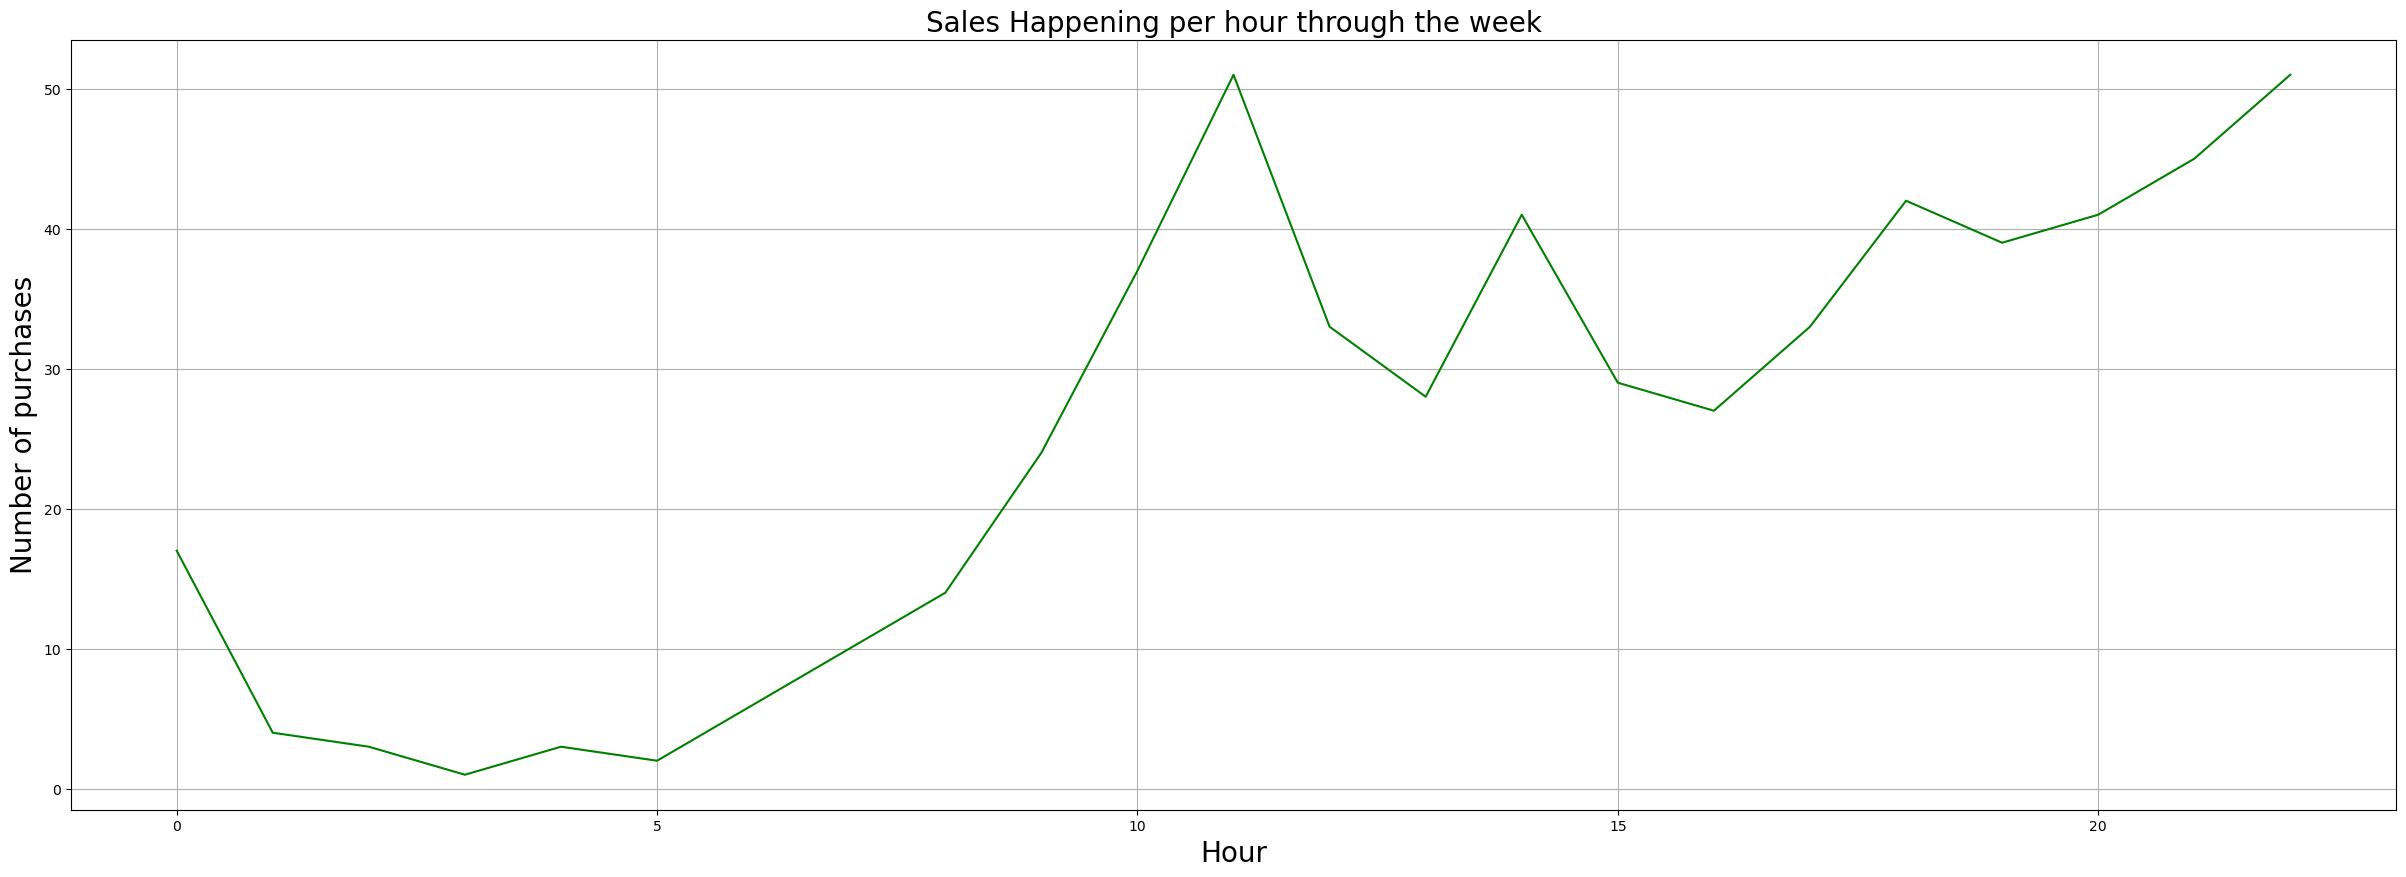